In [3]:
from utilities import input_tools, boostHistHelpers as hh,common
from wremnants import theory_tools, theory_corrections, plot_tools
import uproot
import matplotlib.pyplot as plt
import hist
import numpy as np
from wremnants import syst_tools
from narf import ioutils
import h5py
from wremnants.datasets import datagroups

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
def redoBinning(h, bins="quantiles"):
    if bins == "quantiles":
        bins = common.ptV_10quantiles_binning[:-1]
    elif bins == "approx_quant":
        bins = common.ptV_binning[:-1]
    
    return hist.Hist(hist.axis.Variable(bins, name="ptll"), storage=h.storage_type(), data=h.view(flow=True)[:-1])

In [6]:
with h5py.File("../fitresults_gen_quantilesBinning.hdf5", "r") as h5file:
    res = ioutils.pickle_load_h5py(h5file["results"])

In [5]:
res

{'hist_data_obs': <narf.ioutils.H5PickleProxy at 0x7efca08b3a90>,
 'hist_nobs': <narf.ioutils.H5PickleProxy at 0x7efca08b3670>,
 'hist_prefit': <narf.ioutils.H5PickleProxy at 0x7efca08b1810>,
 'hist_prefit_inclusive': <narf.ioutils.H5PickleProxy at 0x7efca08b2410>,
 'hist_postfit': <narf.ioutils.H5PickleProxy at 0x7efca08b2cb0>,
 'hist_postfit_inclusive': <narf.ioutils.H5PickleProxy at 0x7efca08b2dd0>}

[Hist(Variable([0, 2.95, 4.73, 6.68, 8.98, 11.78, 15.33, 20.11, 27.17, 40.15], name='ptll'), storage=Weight()) # Sum: WeightedSum(value=9, variance=0.00154466) (WeightedSum(value=11, variance=0.00154466) with flow), Hist(Variable([0, 2.95, 4.73, 6.68, 8.98, 11.78, 15.33, 20.11, 27.17, 40.15], name='ptll'), storage=Weight()) # Sum: WeightedSum(value=8.84413, variance=0.0720701) (WeightedSum(value=10.8441, variance=0.0720701) with flow), Hist(Variable([0, 2.95, 4.73, 6.68, 8.98, 11.78, 15.33, 20.11, 27.17, 40.15], name='ptll'), storage=Weight()) # Sum: WeightedSum(value=8.83712, variance=4.56199e-05) (WeightedSum(value=10.8371, variance=4.56199e-05) with flow)]


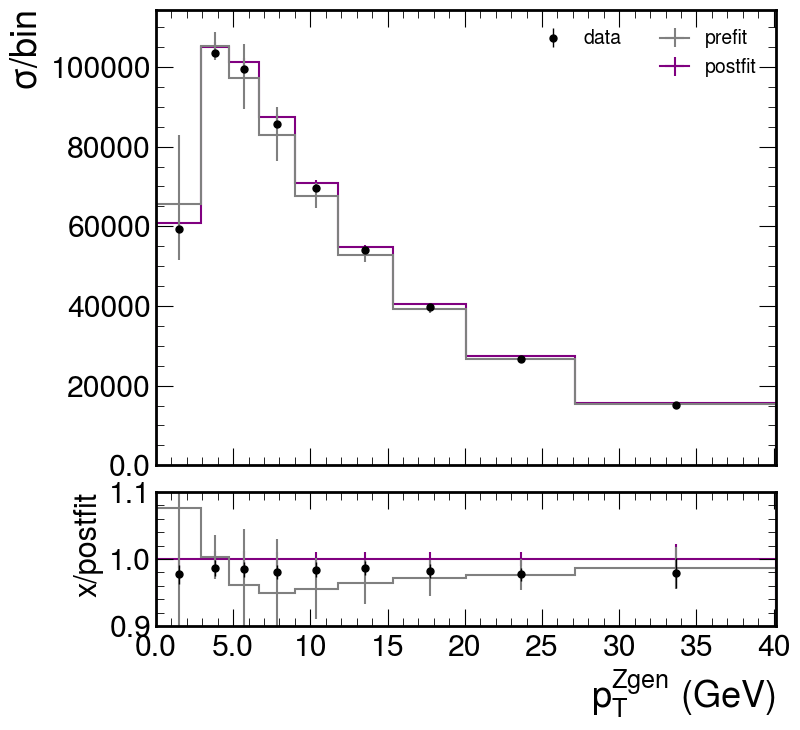

In [7]:
with h5py.File("../fitresults_gen_quantilesBinning.hdf5", "r") as h5file:
    res = ioutils.pickle_load_h5py(h5file["results"])
    fig = plot_tools.makePlotWithRatioToRef(
            [
                redoBinning(res["hist_postfit_inclusive"].get()),
                redoBinning(res["hist_prefit_inclusive"].get()),
                redoBinning(res["hist_data_obs"].get()),
            ],
            data=True,
            labels=["postfit", 'prefit', "data"],#"muR", "", "muF", ""],
            colors=['purple', "grey", 'black'],
            xlabel="p$_{T}^{Zgen}$ (GeV)", 
            ylabel="$\sigma$/bin",
            rlabel="x/postfit",
            linestyles=[None, "solid", "solid"],
            yerr=True,
            binwnorm=1.,
            rrange=[0.9, 1.1],
            #ylim=[-0.8,-0.3],
            baseline=True)

In [ ]:
with h5py.File("../fitresults_gen_quantilesBinning.hdf5", "r") as h5file:
    res = ioutils.pickle_load_h5py(h5file["results"])
    fig = plot_tools.makePlotWithRatioToRef(
            [
                redoBinning(res["hist_postfit_inclusive"].get()),
                #redoBinning(res["hist_prefit_inclusive"].get()),
                redoBinning(res["hist_data_obs"].get()),
            ],
            data=True,
            labels=["postfit", "data"],#"muR", "", "muF", ""],
            colors=['purple', 'black'],
            xlabel="p$_{T}^{Zgen}$ (GeV)", 
            ylabel="$\sigma$/bin",
            rlabel="x/postfit",
            linestyles=[None, "solid", "solid"],
            yerr=True,
            binwnorm=1.,
            rrange=[0.9, 1.1],
            #ylim=[-0.8,-0.3],
            baseline=True)

[Hist(Integer(0, 100, underflow=False, overflow=False, name='obsfull'), storage=Weight()) # Sum: WeightedSum(value=100, variance=0.0456521), Hist(Integer(0, 100, underflow=False, overflow=False, name='obs'), storage=Weight()) # Sum: WeightedSum(value=97.2637, variance=0.0255541)]


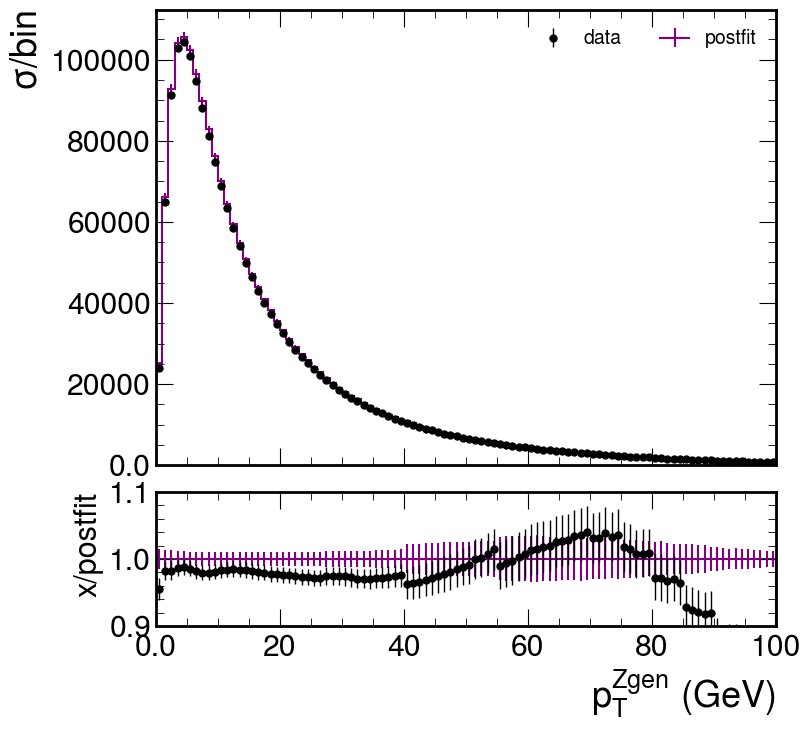

In [9]:
with h5py.File("../fitresults_gen.hdf5", "r") as h5file:
    res = ioutils.pickle_load_h5py(h5file["results"])
    fig = plot_tools.makePlotWithRatioToRef(
            [
                res["hist_postfit_inclusive"].get(),
                #res["hist_prefit_inclusive"].get(),
                res["hist_data_obs"].get(),
            ],
            data=True,
            labels=["postfit", "data"],#"muR", "", "muF", ""],
            colors=['purple', 'black'],
            xlabel="p$_{T}^{Zgen}$ (GeV)", 
            ylabel="$\sigma$/bin",
            rlabel="x/postfit",
            linestyles=[None, "solid", "solid"],
            yerr=True,
            binwnorm=1.,
            rrange=[0.9, 1.1],
            #ylim=[-0.8,-0.3],
            baseline=True)

In [139]:
d = datagroups.Datagroups("../fitresults_gen.hdf5", filter_datasets=False, mode="vgen")

In [140]:
d.copyGroup("Zmumu", "Zmumu_prefit")
d.copyGroup("Zmumu", "Zmumu_postfit")

In [141]:
d.getDatagroups()["Zmumu_prefit"].hists["nominal"] = d.results["hist_prefit_inclusive"].get()
d.getDatagroups()["Zmumu_prefit"].label += " (prefit)"
d.getDatagroups()["Zmumu_prefit"].color = "darkblue"
d.getDatagroups()["Zmumu_postfit"].hists["nominal"] = d.results["hist_postfit_inclusive"].get()
#d.getDatagroups()["Zmumu_postfit"].label += " (postfit)"
d.getDatagroups()["Data"].hists["nominal"] = d.results["hist_data_obs"].get()

In [122]:
groups = d.getDatagroups()

In [143]:
d.getDatagroups()["Zmumu_prefit"].label

'Z$\\to\\mu\\mu$ (prefit)'

In [144]:
d.getDatagroups()["Zmumu_postfit"].label

'Z$\\to\\mu\\mu$'

{'nominal': Hist(Integer(0, 100, underflow=False, overflow=False, name='obsfull'), storage=Weight()) # Sum: WeightedSum(value=1.9722e+06, variance=1.5518e+07)}
{'nominal': Hist(Integer(0, 100, underflow=False, overflow=False, name='obs'), storage=Weight()) # Sum: WeightedSum(value=1.93443e+06, variance=1.93443e+06)}


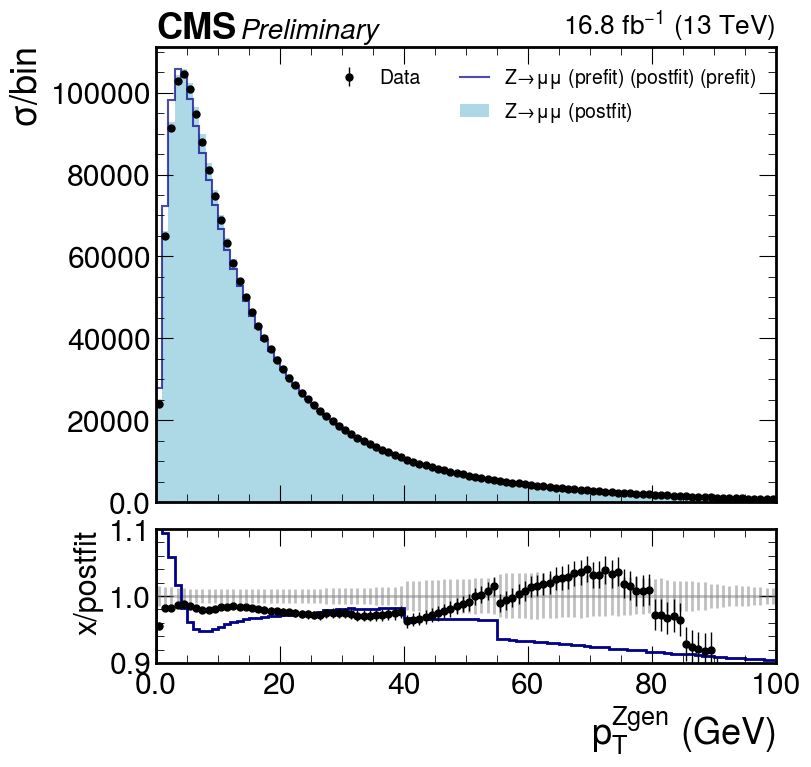

In [145]:
fig = plot_tools.makeStackPlotWithRatio(groups,
            [
                "Zmumu_postfit",
            ],
            histName = "nominal",
            unstacked = ["Data", "Zmumu_prefit"],
            xlabel="p$_{T}^{Zgen}$ (GeV)", 
            ylabel="$\sigma$/bin",
            rlabel="x/postfit",
            binwnorm=1.,
            rrange=[0.9, 1.1],
            #ylim=[-0.8,-0.3],
            baseline=True)